### Imports

In [10]:
import json
import pickle

import tensorflow as tf
from tensorflow.python.keras.utils.np_utils import to_categorical

print("TensorFlow version:", tf.__version__)
from matplotlib import pyplot as plt
import pandas as pd

TensorFlow version: 2.12.0


### Load data

In [ ]:
api_token = {"username": "", "key": ""}

import os

os.makedirs('/root/.kaggle/', exist_ok=True)

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
os.chmod('/root/.kaggle/kaggle.json', mode=600)

import kaggle  # Requires kaggle.json to exists.

kaggle.api.authenticate()

kaggle.api.dataset_download_files('valentynsichkar/traffic-signs-preprocessed', path='data', unzip=True)

### Dataset declaration

In [17]:

import numpy as np


class Dataset:
    def __init__(self, data_name: str = "data8"):
        with open("data/label_names.csv") as labels:
            self.labels = [(lambda a, b: (int(a), b))(*line.split(",")) for line in labels.read().splitlines()[1:] if
                           line]

        with open(f"data/{data_name}.pickle", "rb") as data_pickle:
            data = pickle.load(data_pickle)

        # (86989, 1|3, 32, 32)
        self.train = {"x": data["x_train"], "y": to_categorical(data['y_train'], num_classes=len(self.labels))}

        # (4410, 1|3, 32, 32)
        self.validation = {"x": data["x_validation"],
                           "y": to_categorical(data['y_validation'], num_classes=len(self.labels))}

        # (12630, 1|3, 32, 32)
        self.test = {"x": data["x_test"], "y": to_categorical(data['y_test'], num_classes=len(self.labels))}

    def preview(self, amount=9):
        from math import sqrt, ceil

        plt.figure(figsize=(10, 10))
        for i in range(amount):
            plt.subplot(ceil(sqrt(amount)), ceil(sqrt(amount)), i + 1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(np.moveaxis(self.train["x"][i], 0, -1), interpolation='nearest')
            plt.xlabel(self.labels[self.train["y"][i].tolist().index(1)])
        plt.show()

In [8]:
def prepare_output_for_excel(output: str):
    return '\n'.join(
        ['\t'.join([val for val in row.split(" ")[7::3]]) for row in output.splitlines() if row and "Epoch" not in row])

### Load data0

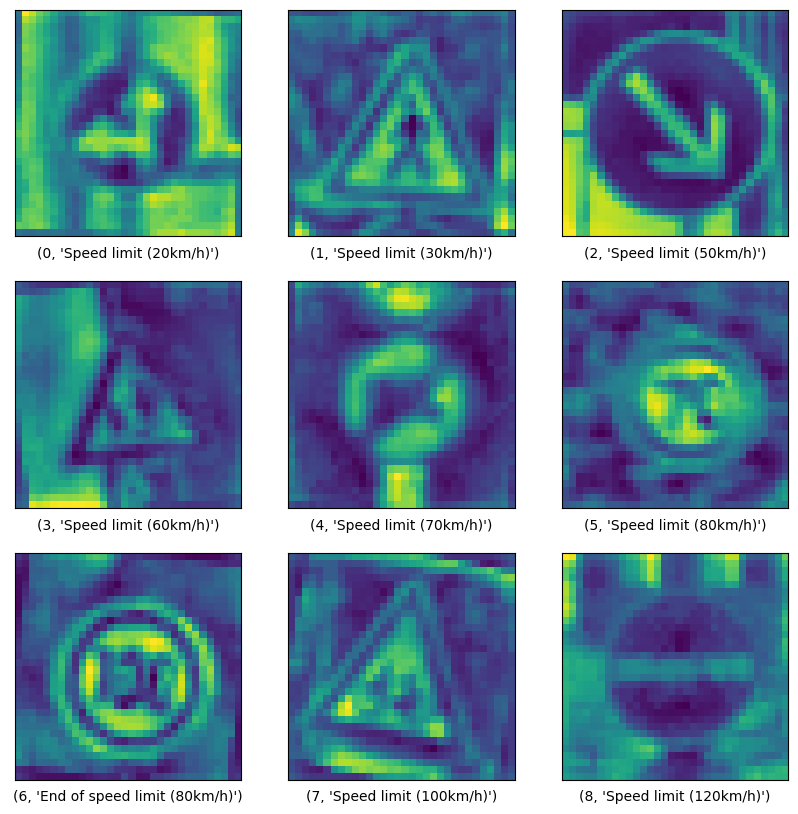

In [21]:
data8 = Dataset("data8")
data8.preview()

In [3]:
from typing import List
class MyDense:
    def __init__(self, neurons: List[int], batch_size, epochs, data: Dataset):
        print(f"{'-'.join([str(neuron) for neuron in neurons])} {batch_size} x{epochs}")
        self.model = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(1, 32, 32)),

            *[tf.keras.layers.Dense(neuron_amount, activation="relu") for neuron_amount in neurons],

            tf.keras.layers.Dense(len(data.labels), activation="softmax")]
        )

        self.model.compile(optimizer='adam',
                                       loss='categorical_crossentropy',
                                       metrics=['accuracy'])

        self.early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=25, restore_best_weights=True)

        self.history = self.model.fit(data.train["x"], data.train["y"], epochs=epochs,
                                                              batch_size=batch_size,
                                                              validation_data=(
                                                                  data.validation["x"], data.validation["y"]),
                                                              callbacks=[self.early_stopping]).history

        results = self.model.evaluate(data.test["x"], data.test["y"], batch_size=128)
        last_best_idx: int = self.history["val_accuracy"].index(max(self.history["val_accuracy"]))
        xy = [{key: val[last_best_idx]} for (key, val) in self.history.items()]

        print("\t".join(["test_l", "test_a"] + [str([*val.keys()][0])[:6] for val in xy]))
        print("\t".join([str(results[0])[:6], str(results[1])[:6]] + [str([*val.values()][0])[:6] for val in xy]))

        pd.DataFrame(self.history).plot(figsize=(8, 5)).axhline(y=1, color=(0, 0, 0), linewidth=0.5)
        plt.show()

NameError: name 'Dataset' is not defined

### MLP 128-128-128 16 x100

In [ ]:
MyDense(neurons=[128, 128, 128], batch_size=16, data=data8, epochs=100)

### MLP 128-128-128 32 x100

In [ ]:
MyDense(neurons=[128, 128, 128], batch_size=32, data=data8, epochs=100)

### MLP 128-128-128 64 x100

In [ ]:
MyDense(neurons=[128, 128, 128], batch_size=64, data=data8, epochs=100)

### MLP 128-128-128 128 x100

In [ ]:
MyDense(neurons=[128, 128, 128], batch_size=128, data=data8, epochs=100)

### MLP 128-128-128 256 x100

In [ ]:
MyDense(neurons=[128, 128, 128], batch_size=256, data=data8, epochs=100)

### MLP 128-128-128 512 x100

In [ ]:
MyDense(neurons=[128, 128, 64], batch_size=512, data=data8, epochs=100)

### MLP 128-128-64 256 x100

In [ ]:
MyDense(neurons=[128, 128, 64], batch_size=256, data=data8, epochs=100)

### MLP 128-128 256 x100

In [ ]:
MyDense(neurons=[128, 128], batch_size=256, data=data8, epochs=100)

### MLP 128-128 128 x100

In [ ]:
MyDense(neurons=[128, 128], batch_size=128, data=data8, epochs=100)

### MLP 128-128 64 x100

In [ ]:
MyDense(neurons=[128, 128], batch_size=64, data=data8, epochs=100)

### MLP 128-64 128 x100

In [ ]:
MyDense(neurons=[128, 64], batch_size=128, data=data8, epochs=100)

### MLP 128 128 x100

In [ ]:
MyDense(neurons=[128], batch_size=128, data=data8, epochs=100)